In [40]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns

In [8]:
# Load the dataset
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
fruits = np.load("fruits_300.npy")

--2025-05-18 12:09:18--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-05-18 12:09:18--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-05-18 12:09:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... c

In [31]:
X = pd.DataFrame(fruits.reshape(-1, 100*100))

In [39]:
X.shape


(300, 10000)

In [ ]:
# 모델생성
k = 3 # 원하는 군집 수 (K) 설정
kmeans_model = KMeans(n_clusters=k, # 군집의 개수
                      init='k-means++', # 초기 중심점 선택 방식 (기본은 k-means++)
                      n_init='auto', # 다른 초기 중심점으로 여러 번 실행할 횟수 (auto는 버전에 따라 다름, 보통 10)
                      max_iter=300, # 최대 반복 횟수
                      random_state=42) # 결과 재현을 위한 시드

"""
# 옵션 1
# 모델 학습 (데이터에 적용하여 군집화 수행) 
kmeans_model.fit(X) # 원본 데이터 사용 시 (데이터 특성에 따라)
# 반환
kmeans_model.transform(X)
# 예측 
labels = kmeans_model.predict(X)

# 옵션 2 : 모델 학습 및 반환 (한번에 할 경우)
kmeans_model.fit_transform(X)
# 예측
kmeans_model.predict(data)
"""
# 옵션 3 : 모델 학습 및 예측
kmeans_model.fit_predict(X)

"""
참조) transform() vs predict() : 반환하는 정보가 다름
transform() 각 클러스터 중심까지의 거리 배열 - 이상치 탐지(특정 클러스터 중심과의 거리가 매우 먼 데이터 이상치 간주 가능)
predict()
"""

# 결과 확인
print(kmeans_model.labels_) # 각 데이터 포인트가 속한 군집 레이블 (예측한 군집 번호)
print(kmeans_model.cluster_centers_) # 각 군집의 중심점 좌표 (centroid)
print(kmeans_model.n_iter_) # 최종 클러스터 할등을 찾는데 알고리즘이 수행한 반복 횟수
print(kmeans_model.inertia_) # 군집 내 거리 제곱합 (SSE)
print(kmeans_model.n_clusters) # 군집 개수


# 원본 데이터와 레이블을 옆으로 붙이기
df = X.copy() # 원본 데이터 복사
df['cluster'] = kmeans_model.labels_ # 원본 데이터에 군집 레이블 추가

print(df[:5]) # 레이블 확인

# 군집 시각화

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.10204082 1.07142857 1.10204082 ... 1.         1.         1.        ]
 [1.01111111 1.01111111 1.01111111 ... 1.         1.         1.        ]]
4
5075273831.931915
3
   0  1  2  3  4  5  6  7  8  9  ...  9991  9992  9993  9994  9995  9996  \
0  1  1  1  1  1  1  1  1  1  1  ...     1     1     1     1     1     1

In [ ]:
# 실루엣 점수 계산
"""
범위: -1 ~ 1
해석:
    +1에 가까울수록: 클러스터링이 잘 됨 (응집도 높고, 분리도 좋음)
    0에 가까울수록: 클러스터 경계에 있거나, 클러스터링이 명확하지 않음
    -1에 가까울수록: 클러스터 할당이 잘못됨 (나쁜 클러스터링)
전체 스코어 해석:
    높을수록: 좋은 클러스터링
    낮을수록: 클러스터 정의가 안 되었거나, 데이터가 흩어져 있음
    음수: 개별 데이터 포인트가 잘못 할당됨

0.25 이하: 클러스터가 서로 겹쳐 있음
0.25 ~ 0.5: 클러스터가 겹치고 있음
0.5 ~ 0.7: 클러스터가 잘 분리되어 있음
0.7 ~ 1: 클러스터가 매우 잘 분리되어 있음
"""
silhouette_avg = silhouette_score(X, kmeans_model.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.22


In [ ]:
# Davies-Bouldin 지수 평가
"""
특징: 낮을수록 좋은 클러스터링
해석:
    0에 가까울수록: 매우 좋은 클러스터링 (높은 응집도, 높은 분리도)
    낮은 양수 값: 괜찮은 클러스터링 (비교적 높은 응집도, 어느 정도 분리도)
    높은 양수 값: 나쁜 클러스터링 (낮은 응집도 또는 낮은 분리도)
전체 스코어 해석:
    낮을수록: 더 나은 클러스터링 ( 응집되고 잘 분리됨)
    높을수록: 클러스터 구분이 안 되거나, 내부 응집력이 낮음

    0 ~ 1: 클러스터가 잘 분리되어 있음
    1 ~ 2: 클러스터가 겹쳐 있음
    2 ~ 3: 클러스터가 서로 겹쳐 있음
    3 ~ : 클러스터가 매우 겹쳐 있음
"""
db_index = davies_bouldin_score(X, kmeans_model.labels_)
print(f"Davies-Bouldin 지수: {db_index:.3f}")

Davies-Bouldin 지수: 1.523


In [46]:
kmeans_model.cluster_centers_.shape

(3, 10000)

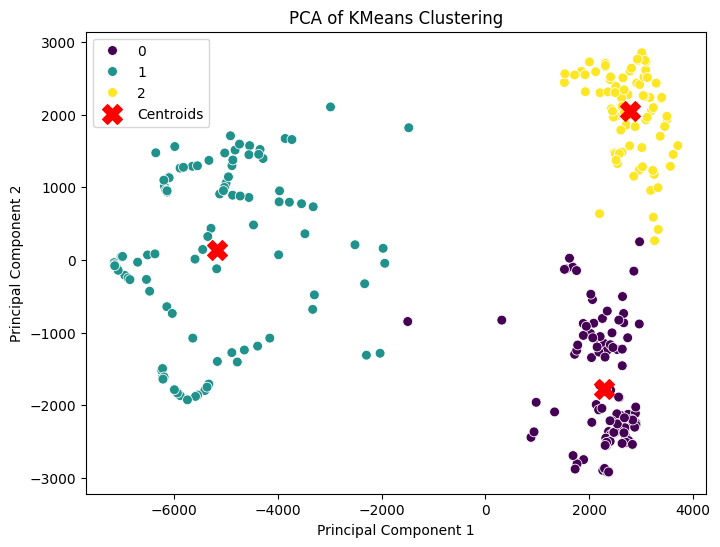

In [49]:
# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop('cluster', axis=1)) # 군집 레이블 제외
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']) ## PCA 결과를 DataFrame으로 변환
df_pca['cluster'] = df['cluster'] # 군집 레이블 추가
centriods_pca = pca.transform(kmeans_model.cluster_centers_) # 군집 중심점 PCA 변환

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis', s=50)
plt.scatter(centriods_pca[:, 0], centriods_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('PCA of KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()